In [2]:
%load_ext autoreload
%autoreload 1
%matplotlib notebook
%pylab

import io
import subprocess
import pickle 

import scipy as sp
import scipy.optimize
import scipy.stats

from IPython.display import Image
from astropy import units as un, constants as ct

%aimport stellar
from stellar import *

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
#### GLOBAL CHECKPOINT: load all populations ####

with open("data/final_stars_solar_met.pkl", "rb") as f:
    starsI, configs = pickle.load(f)
with open("data/final_stars_popII_popIII.pkl", "rb") as f:
    starsII, starsIII = pickle.load(f)
masses = logspace(log10(0.08), log10(150), 100)  # Final masses

#stars = array((starsI, starsII, starsIII))

# SALPETER FUNCTION

The Salpeter function is $ \xi(M)=\xi_{0}M^{-2.35} $.

We can calculate $ \xi_{0} $ from the total mass of the cluster which we know $M_{T}=10^{4}M_{0}$

$M_{T}= \int_{M_{1}}^{M_{2}} M \xi(M) dM $

$\xi_{0}=3178 M_{0}^{1.35}$

<IPython.core.display.Javascript object>


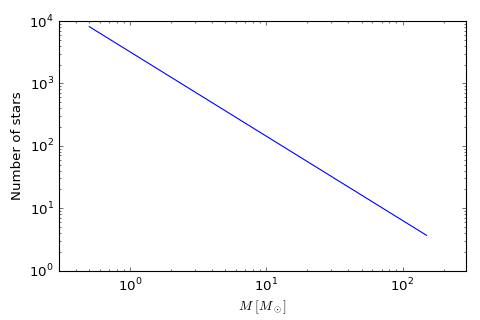

In [13]:
x=logspace(log10(0.5),log10(150),100)
fig, ax =subplots(figsize=(6, 4))
y= stellar.ksi(x)*x


ax.plot(x,y)
ax.set_xlim(0.3, 290)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$M \ [M_\odot]$")
ax.set_ylabel("Number of stars")

fig.savefig("imatges/numberstars_mass.pdf")
fig.tight_layout()

# TOTAL LUMINOSITY OF THE CLUSTER

In order to compute the total luminosity we will have to solve the following integration

$L = \int_{M_{1}}^{M_{2}}L(M)\xi(M)dM$

## Population I

In [4]:
intpollumI = sp.interpolate.interp1d(
    log10(masses), # masses
    starsI[:,6,-1], # luminosities
    kind='linear'
)

def integrantlumI(M):
    lum = 10**intpollumI(log10(M)) / L_SUN 
    
    return lum * stellar.ksi(M)


The total luminosity of the cluster is:

In [24]:
lumtotI = sp.integrate.quad(integrantlumI,0.5,150)
print(lumtotI)

(13113364.677722285, 255.96429057399416)


/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


<IPython.core.display.Javascript object>


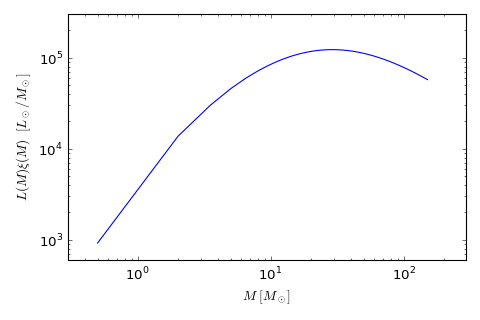

In [5]:
x=linspace(0.5, 150, 100)

fig, ax = subplots( figsize=(6,4))

y = integrantlumI(x)

ax.plot(x, y)

ax.set_xlim(0.3, 290)
ax.set_ylim(6e2, 3e5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$M \ [M_\odot]$")
ax.set_ylabel(r"$L(M) \xi(M) \ \ [L_\odot/M_\odot]$")

fig.tight_layout()
fig.savefig("imatges/luminosityksi_mass.pdf")


As we can see in the figure the most of the luminosity contribution to the cluster comes from the massive stars.

## Population II 

In [58]:
index= ~np.isnan(starsII[:,6,-1])
intpollumII = sp.interpolate.interp1d(
    log10(masses[index]), # masses
    starsII[index,6,-1], # luminosities
    kind='quadratic'
)

def integrantlumII(M):
    lum = 10**intpollumII(log10(M)) / L_SUN 
    
    return lum * stellar.ksi(M)

In [28]:
lumtotII = sp.integrate.quad(integrantlumII,0.5,150)
print(lumtotII)

(9793399.211680267, 303.789386807662)


/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


<IPython.core.display.Javascript object>


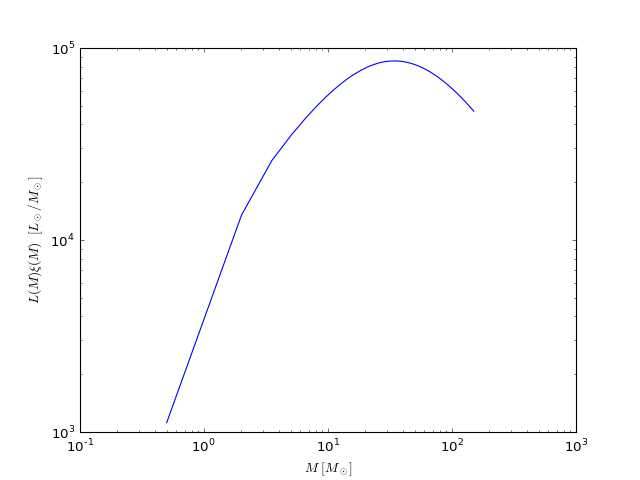

In [67]:
x=linspace(0.5, 150, 100)

fig, ax = subplots()

y = integrantlumII(x) 

ax.plot(x, y)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$M \ [M_\odot]$")
ax.set_ylabel(r"$L(M) \xi(M) \ \ [L_\odot/M_\odot]$")

## Population III

In [59]:
index= ~np.isnan(starsIII[:,6,-1])
intpollumIII = sp.interpolate.interp1d(
    log10(masses[index]), # masses
    starsIII[index,6,-1], # luminosities
    kind='quadratic'
)

def integrantlumIII(M):
    lum = 10**intpollumIII(log10(M)) / L_SUN 
    
    return lum * stellar.ksi(M)

In [32]:
lumtotIII = sp.integrate.quad(integrantlumIII,0.5,150)
print(lumtotIII)

(10259751.703014255, 375.6704801386253)


/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


<IPython.core.display.Javascript object>


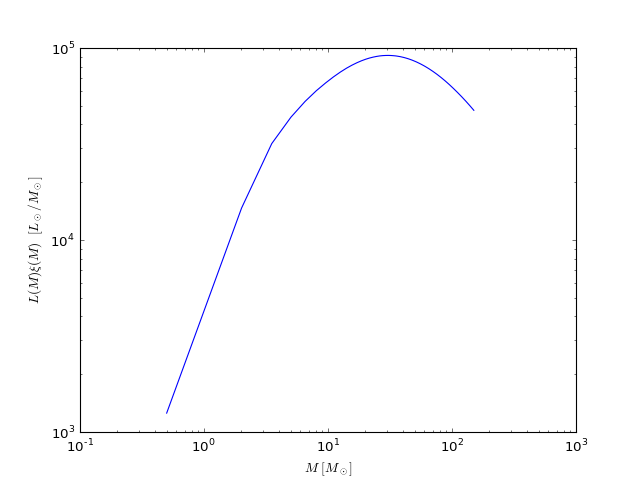

In [68]:
x=linspace(0.5, 150, 100)

fig, ax = subplots()

y = integrantlumIII(x)

ax.plot(x, y)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$M \ [M_\odot]$")
ax.set_ylabel(r"$L(M) \xi(M) \ \ [L_\odot/M_\odot]$")

<IPython.core.display.Javascript object>


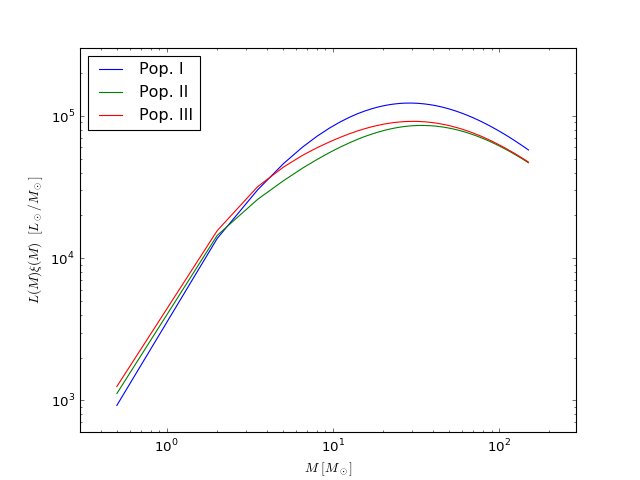

In [60]:
x=linspace(0.5, 150, 100)

fig, ax=subplots()

ax.plot(x, integrantlumI(x), label="Pop. I")
ax.plot(x, integrantlumII(x), label="Pop. II")
ax.plot(x, integrantlumIII(x), label="Pop. III")

ax.set_xlim(0.3, 290)
ax.set_ylim(6e2, 3e5)
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(loc="best")
ax.set_xlabel(r"$M \ [M_\odot]$")
ax.set_ylabel(r"$L(M) \xi(M) \ \ [L_\odot/M_\odot]$")

fig.savefig("imatges/luminosityksi_masses_populations.pdf")

# BLACK BODY SPECTRUM OF THE CLUSTER 

$B_{\lambda}(T(M))=\dfrac{2hc²}{\lambda⁵}\dfrac{1}{e^{\dfrac{hc}{\lambda k_{B}T(M)}}-1}$

$B_{\lambda}=\int_{M_{1}}^{M_{2}} B_{\lambda}(T(M)) \xi(M)dM$

<IPython.core.display.Javascript object>


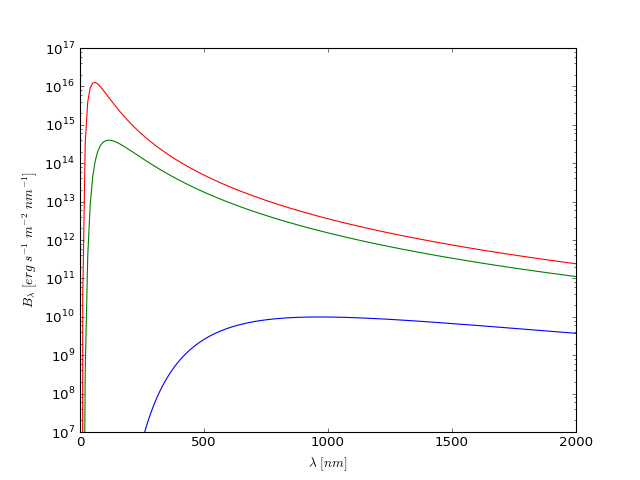

/home/andreu/Documents/Física/Màster/Astrofísica Estelar/Treball estructura estelar/Projecte Stellar Structure/stellar.py:377: RuntimeWarning: overflow encountered in exp
  return ((2* 6.626e-27*(3e8)**2)/(wl)**5) *(1/(np.exp((6.626e-27*3e8)/(wl*1.38e-16*temp))-1))


In [77]:
wl=linspace(1e-9,2e-6,200)
fig, ax = subplots()

y = [1e-9*stellar.radiance(3000,x) for x in wl]
a = [1e-9*stellar.radiance(25000,x) for x in wl]
b = [1e-9*stellar.radiance(50000,x) for x in wl]

ax.plot(1e9*wl,y)
ax.plot(1e9*wl,a)
ax.plot(1e9*wl,b)

ax.set_yscale("log")
ax.set_ylim([1e7,None])
ax.set_xlabel(r"$\lambda \ [nm]$")
ax.set_ylabel(r"$B_\lambda \ [erg \ s^{-1} \ m^{-2} \ nm^{-1}]$")


## Population I

In [6]:
intpollumI = sp.interpolate.interp1d(
    log10(masses), # masses
    starsI[:,6,-1], # lluminosities
    kind='linear'
)
intpolradI= sp.interpolate.interp1d(
    log10(masses), # masses
    starsI[:,2,-1], # radii
    kind='linear'
)
def integrantB_nuI(M):
    temp = ((10**intpollumI(log10(M)))/ (4*3.1416*(10**intpolradI(log10(M)))**2*5.67e-5))**0.25
    return stellar.radiance(temp,wl) * stellar.ksi(M)

In [7]:
radiancetotI=[]
x=linspace(1e-15,4e-7,100)
for wl in x:
    radiancetotI.append(sp.integrate.quad(integrantB_nuI,0.5,150))
#radiancetotI is an array with x rows and 2 columns  
novaradI=np.empty([100,])

for y in range (1,100):
    novaradI[y-1]=radiancetotI[y-1][0]
#novaradI has the dimensions we were looking for [x,]

/home/andreu/Documents/Física/Màster/Astrofísica Estelar/Treball estructura estelar/Projecte Stellar Structure/stellar.py:386: RuntimeWarning: overflow encountered in exp
  return ((2* 6.626e-27*(3e8)**2)/(wl)**5) *(1/(np.exp((6.626e-27*3e8)/(wl*1.38e-16*temp))-1))
/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance 

<IPython.core.display.Javascript object>


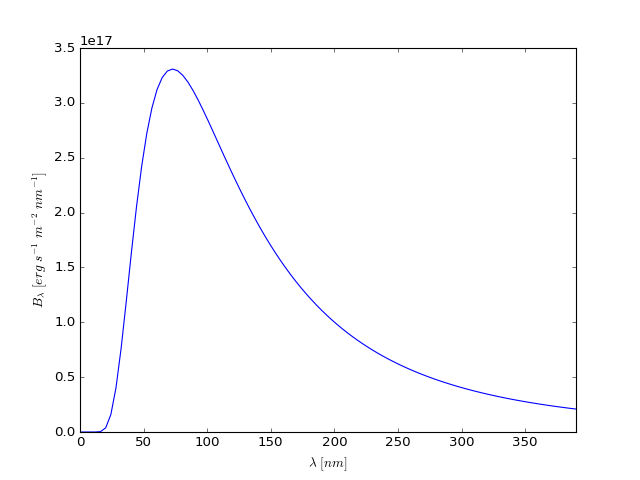

In [21]:
wl=linspace(1e-15,4e-7,100)
fig, ax = subplots()
ax.plot(1e9*wl,1e-9*novaradI)

ax.set_xlim(0,390)
ax.set_xlabel(r"$\lambda \ [nm]$")
ax.set_ylabel(r"$B_\lambda \ [erg \ s^{-1} \ m^{-2} \ nm^{-1}]$")

## Population II

In [8]:
index=~isnan(starsII[:,6,-1])
intpollumII = sp.interpolate.interp1d(
    log10(masses[index]), # masses
    starsII[index,6,-1], # luminosity
    kind='quadratic'
)
intpolradII = sp.interpolate.interp1d(
    log10(masses[index]), # masses
    starsII[index,2,-1], # radius
    kind='quadratic'
)
def integrantB_nuII(M):
    temp = ((10**intpollumII(log10(M)))/ (4*3.1416*(10**intpolradII(log10(M)))**2*5.67e-5))**0.25
    return stellar.radiance(temp,wl) * stellar.ksi(M)

In [9]:
radiancetotII=[]
x=linspace(1e-15,4e-7,100)
for wl in x:
    radiancetotII.append(sp.integrate.quad(integrantB_nuII,0.5,150))
#radiancetot es una matriu amb x files i 2 columnes  
novaradII=np.empty([100,])

for y in range (1,100):
    novaradII[y-1]=radiancetotII[y-1][0]
#novarad te les dimensions que desitgem [x,]

/home/andreu/Documents/Física/Màster/Astrofísica Estelar/Treball estructura estelar/Projecte Stellar Structure/stellar.py:386: RuntimeWarning: overflow encountered in exp
  return ((2* 6.626e-27*(3e8)**2)/(wl)**5) *(1/(np.exp((6.626e-27*3e8)/(wl*1.38e-16*temp))-1))
/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


<IPython.core.display.Javascript object>


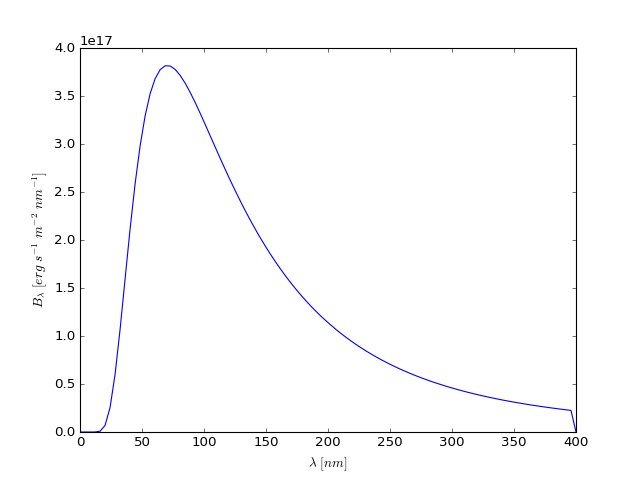

In [79]:
wl=linspace(1e-15,4e-7,100)
fig, ax = subplots()
ax.plot(1e9*wl,1e-9*novaradII)

ax.set_xlabel(r"$\lambda \ [nm]$")
ax.set_ylabel(r"$B_\lambda \ [erg \ s^{-1} \ m^{-2} \ nm^{-1}]$")

## Population III

In [10]:
index=~isnan(starsIII[:,6,-1])
intpollumIII = sp.interpolate.interp1d(
    log10(masses[index]), # masses
    starsIII[index,6,-1], # luminosity
    kind='quadratic'
)
intpolradIII = sp.interpolate.interp1d(
    log10(masses[index]), # masses
    starsIII[index,2,-1], # radius
    kind='quadratic'
)
def integrantB_nuIII(M):
    temp = ((10**intpollumIII(log10(M)))/ (4*3.1416*(10**intpolradIII(log10(M)))**2*5.67e-5))**0.25
    return stellar.radiance(temp,wl) * stellar.ksi(M)

In [11]:
radiancetotIII=[]
x=linspace(1e-15,4e-7,100)
for wl in x:
    radiancetotIII.append(sp.integrate.quad(integrantB_nuIII,0.5,150))
#radiancetot es una matriu amb x files i 2 columnes  
novaradIII=np.empty([100,])

for y in range (1,100):
    novaradIII[y-1]=radiancetotIII[y-1][0]
#novarad te les dimensions que desitgem [x,]

/home/andreu/Documents/Física/Màster/Astrofísica Estelar/Treball estructura estelar/Projecte Stellar Structure/stellar.py:386: RuntimeWarning: overflow encountered in exp
  return ((2* 6.626e-27*(3e8)**2)/(wl)**5) *(1/(np.exp((6.626e-27*3e8)/(wl*1.38e-16*temp))-1))
/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


<IPython.core.display.Javascript object>


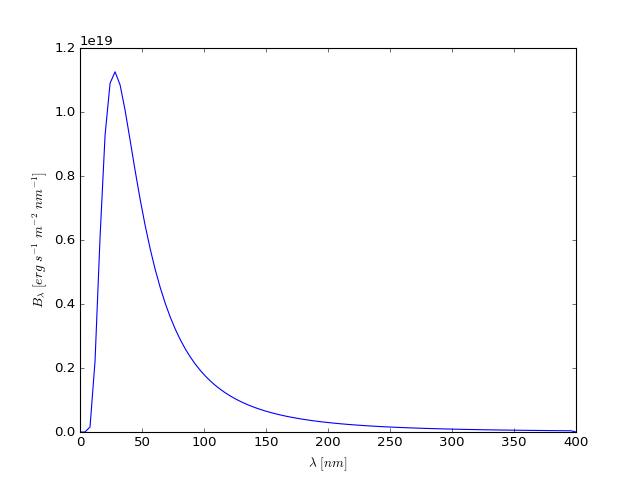

In [80]:
wl=linspace(1e-15,4e-7,100)
fig, ax = subplots()
ax.plot(1e9*wl,1e-9*novaradIII)

ax.set_xlabel(r"$\lambda \ [nm]$")
ax.set_ylabel(r"$B_\lambda \ [erg \ s^{-1} \ m^{-2} \ nm^{-1}]$")

## **BLACK BODY SPECTRUM THREE POPULATIONS**

/home/andreu/Documents/Física/Màster/Astrofísica Estelar/Treball estructura estelar/Projecte Stellar Structure/stellar.py:386: RuntimeWarning: overflow encountered in exp
  return ((2* 6.626e-27*(3e8)**2)/(wl)**5) *(1/(np.exp((6.626e-27*3e8)/(wl*1.38e-16*temp))-1))


<IPython.core.display.Javascript object>


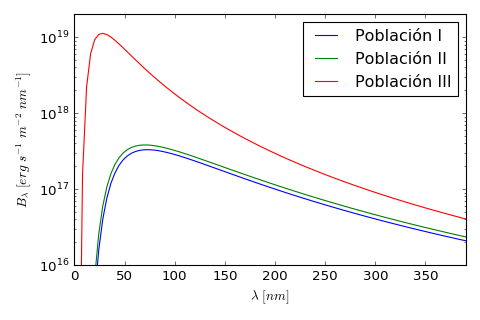

In [12]:
wl=linspace(1e-15,4e-7,100)
y = [1e-9*stellar.radiance(3000,x) for x in wl]

fig, ax = subplots(figsize=(6,4))

ax.plot(1e9*wl,1e-9*novaradI, label="Población I")
ax.plot(1e9*wl,1e-9*novaradII, label="Población II")
ax.plot(1e9*wl,1e-9*novaradIII, label="Población III")

ax.set_xlim(0, 390)
ax.set_ylim(1e16, 2e19)
ax.set_yscale("log")
ax.legend(loc="best")
ax.set_xlabel(r"$\lambda \ [nm]$")
ax.set_ylabel(r"$B_\lambda \ [erg \ s^{-1} \ m^{-2} \ nm^{-1}]$")

fig.tight_layout()
fig.savefig("imatges/radiancia_longitudonda.pdf")

In [84]:
a=1e-9*max(novaradI)
b=1e-9*max(novaradII)
c=1e-9*max(novaradIII)

for i in range (100):
    if novaradI[i]==a:
        A=wl[i]
        
for i in range (100):
    if novaradII[i]==b:
        B=wl[i]
        
for i in range (100):
    if novaradIII[i]==c:
        C=wl[i]

print("PI=", a, 1e9*A ,"nm")
print("PII=", b, 1e9*B,"nm")
print("PIII=", c, 1e9*C, "nm")

PI= 3.30807340237e+17 72.7272735455 nm
PII= 3.81476067596e+17 68.6868695152 nm
PIII= 1.12567315542e+19 28.2828292121 nm


The three star clusters are emmiting with a maximum in the UV rays.

# EVOLUTION STAR CLUSTER

## EVOLUTION CODE 

In [5]:
X0, Y0 = 0.747, 0.24

E_REAC = (26.74 * un.MeV).cgs.value
M_P = ct.m_p.cgs.value
M_HE = 4 * M_P

masses0 = logspace(log10(0.08),log10(150),100)
masses = logspace(log10(0.5), log10(150), 50)

def x_time(time, eps, mass):
    return X0 - time * eps / E_REAC * 4 * M_P / (mass * M_SUN)

def y_time(time, eps, mass):
    return Y0 + time * eps / E_REAC * M_HE / (mass * M_SUN)

Establim un pas de temps adaptatiu establert prèviament estimant el temps que tardarien en aplegar al límit evolutiu les estrelles al límit del canvi d'ordre de magnitud en masses solars. D'aquesta manera assegurem que les estrelles més massives d'un mateix ordre de magnitud donen un mínim d'iteracions temporals abans de morir.

Exemple: l'increment determinat per a 10 Ms s'emprarà per a les masses (1, 10].

In [1]:
n_iters = 300
increments = empty(len(masses))

for im, m in enumerate(masses):
    configs = interp_configs(m, X0, Y0, masses0, starsI)[:,0]
    newstar = zams(*configs, load_all=True)

    eps_total = 10**newstar[7,0] * newstar[1,0]
    for k in range(1, newstar.shape[-1]):
        eps_k = 10 ** newstar[7,k]
        mr, mrp = 1 - newstar[1,[k,k-1]]
        eps_total += eps_k * (mr - mrp)
    eps_total *= m * M_SUN
    
    increments[im] = (0.1 * (E_REAC * m*M_SUN)
                          / ((1.8*n_iters) * eps_total * 4*M_P))

In [7]:
_file = "data/young_star_cluster_evolution_increments.pkl"

# with open(_file, 'wb') as f:
#     pickle.dump(increments, f)

with open(_file, 'rb') as f:
    increments = pickle.load(f)
n_iters = 300 

In [16]:
cluster_evolution = full((len(masses), n_iters, 5), nan, dtype=float)

for im, m in enumerate(masses):    
    configs = interp_configs(m, 0.747, 0.24, masses0, starsI)[:,0]
    newstar = zams(*configs, load_all=True)
    
    eps_total = 10**newstar[7,0] * newstar[1,0]
    for k in range(1, newstar.shape[-1]):
        eps_k = 10 ** newstar[7,k]
        mr, mrp = 1 - newstar[1,[k,k-1]]
        eps_total += eps_k * (mr - mrp)
    eps_total *= m*M_SUN
    
    cluster_evolution[im,0,0] = newstar[6,-1]#luminosity
    cluster_evolution[im,0,1] = newstar[2,-1]#radius
    cluster_evolution[im,0,2] = eps_total #total energy generation rate
    cluster_evolution[im,0,3] = 0.747 # hydrogen fraction
    cluster_evolution[im,0,4] = 0.24  # helium fraction
    
    interval = increments[im]
    
    for i in range(1, n_iters):
        print("Massa %3.2f (%3d), iteració %3d..." % (m, im, i), end='\r', flush=True)
        
        # CALCULS ESTRELLA NOVA
        eps_rp = cluster_evolution[im,i-1,2]
        x = x_time(i*interval, eps_rp, m) #hydrogen fraction
        y = y_time(i*interval, eps_rp, m) #helium fraction
        
        newstar = zams(  # Gastem la x,y,P,T,R,L de la iteració anterior
            m,
            x, y,
            newstar[3,0], # P
            newstar[4,0], # T
            newstar[2,-1], # R
            newstar[6,-1], # L
            load_all=True
        )
        
        eps_total = 10**newstar[7,0] * newstar[1,0]
        for k in range(1, newstar.shape[-1]):
            eps_k = 10 ** newstar[7,k]
            mr, mrp = 1 - newstar[1,[k,k-1]]
            eps_total += eps_k * (mr - mrp)
        eps_total *= m*M_SUN
        
        # ESCRIPTURA RESULTATS
        cluster_evolution[im,i,0]= newstar[6,-1] #luminosity
        cluster_evolution[im,i,1]= newstar[2,-1] #radi
        cluster_evolution[im,i,2]= eps_total #total energy generation rate 
        cluster_evolution[im,i,3]= x #hydrogen fraction
        cluster_evolution[im,i,4]= y #helium fraction
        
        if x / 0.747 < 0.9:
            break

In [8]:
_file = "data/young_star_cluster_evolution.pkl"

#with open(_file, "wb") as f:
#    pickle.dump(cluster_evolution, f)

with open(_file, "rb") as f:
    cluster_evolution = pickle.load(f)

n_iters = 300 
masses0 = logspace(log10(0.08),log10(150),100)
masses = logspace(log10(0.5), log10(150), 50)

def closest_instant(t, m):
    """Funció per determinar l'índex de l'instant temporal
    més proper a un temps donat."""
    im = abs(masses - m).argmin()
    return int(around(t / increments[im]))
closest_instant = vectorize(closest_instant, otypes=(int,))

def get_time(i, m):
    """Funció per determinar el temps d'un instant evolutiu
    d'una massa donada."""
    im = abs(masses - m).argmin()
    return i * increments[im]
get_time = vectorize(get_time, otypes=(float,))

def get_max_age(m, cluster_evolution):
    """Torna l'edat màxima que ha assolit l'estrella d'índex 'im'
    en la simulació ('cluster_evolution')."""
    im = abs(masses - m).argmin()
    i = where(isnan(cluster_evolution[im,:,0]))[0]
    if i.size > 0:
        i = i[0]
    else:
        i = 299
    return get_time(i, m)
get_max_age = vectorize(get_max_age, otypes=(float,), excluded=(1,))

Mostrem 'n_instants' temporals distribuits logarítmicament des del instant inicial fins l'edat de l'estrella més temps evolucionada.

In [9]:
# Punts temporals
n_instants = 300
instants = logspace(
    log10(get_time(1,150)),  # Ometem l'instant inicial
    log10(get_time(n_iters-1, 0.5)), # Edat estrella més vella
    n_instants
)
sigma_sb = ct.sigma_sb.cgs.value  # Ct. Stefan-Boltzmann

# Arrays dels resultats
lums_evol = full((len(masses), n_instants), nan, dtype=float)
rads_evol = full((len(masses), n_instants), nan, dtype=float)
temps_eff_evol = full((len(masses), n_instants), nan, dtype=float)

for im, m in enumerate(masses):
    for it, t in enumerate(instants):
        # Troba l'índex de l'instant 't' en 'cluster_evolution'.
        i = closest_instant(t, m)
        if i >= n_iters: break  # La sim. acaba abans que muiga
        lum10 = cluster_evolution[im, i, 0]
        if isnan(lum10): break  # Fi evolució massa 'm'
            
        # Lluminositat i radi en c.g.s.
        lum = 10 ** lum10
        radi = 10 ** cluster_evolution[im, i, 1]
        
        # Càlcul de la temperatura efectiva
        lums_evol[im, it] = lum10  # DESE EL VALOR ORIGINAL EN LOG10
        temps_eff_evol[im, it] = (lum / (4 * pi * radi**2 * sigma_sb)) ** 0.25
        rads_evol[im, it] = cluster_evolution[im, i, 1]
#     raise KeyboardInterrupt

<IPython.core.display.Javascript object>


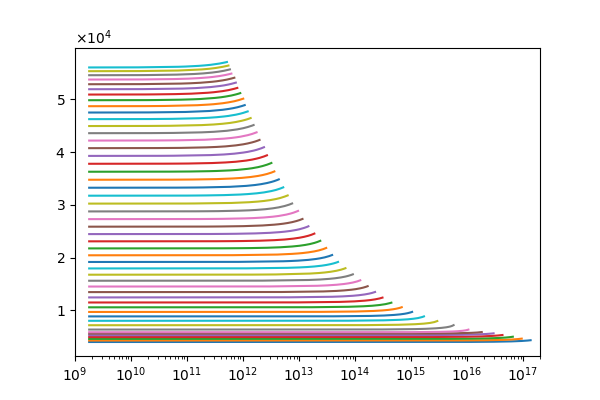

(1000000000.0, 2e+17)

In [130]:
fig, ax = subplots()

for im in range(50):
    ax.plot(instants, temps_eff_evol[im])

ax.set_xscale('log')
ax.set_xlim([1e9, 2e17])

## H-R DIAGRAM

In [21]:
fig, ax = subplots(nrows=5, figsize=(5, 8))
tinstants=[r"0 yr", r"85000 yr",r"0.50 Myr", r"10 Myr", r"230 Myr"  ]
for k, it in enumerate(range(50, n_instants, 50)):
    ax[k].scatter(temps_eff_evol[:, it], 10**lums_evol[:, it], s=4, cmap=plt.cm.Blues)
    ax[k].annotate(
         tinstants[k],
         xy=(1,1),
         xytext=(-10, -10),
         xycoords='axes fraction',
         textcoords= 'offset points',
         va='top',
         ha='right'
     )
    
    ax[k].set_xscale('log')
    ax[k].set_yscale('log')
    ax[k].set_yticks([1e32, 1e35, 1e38, 1e41])
    ax[k].set_xlim((3e3, 6e4))
    ax[k].set_ylim((1e32, 1e41))
    ax[k].invert_xaxis()
    
    if k < len(ax)-1:
        ax[k].xaxis.set_visible(False)
ax[2].set_ylabel("Luminosidad $[L_{\odot}]$")
ax[-1].set_xlabel("Temperatura  [K]")

fig.tight_layout()
fig.subplots_adjust(hspace=0.15)

fig.savefig("imatges/HD_evolucion.pdf")

<IPython.core.display.Javascript object>


## BLACK-BODY SPECTRUM OF THE CLUSTER

In [29]:
i_instants = np.array((0, 120, 150, 200, 250))
t_instants = instants[i_instants]
novarad_evo=np.empty([5,100])

def integrantB_nu_evo(M):
    temp = ((10**intpollum_evo(log10(M)))/ (4*3.1416*(10**intpolrad_evo(log10(M)))**2*5.67e-5))**0.25
    return stellar.radiance(temp,wl) * stellar.ksi(M)

for ii, i in enumerate(i_instants) :

    index=~isnan(lums_evol[:,i])
    intpollum_evo = sp.interpolate.interp1d(
        log10(masses[index]), # masses
        lums_evol[index, i], # luminosity
        kind='quadratic'
        )
    
    intpolrad_evo = sp.interpolate.interp1d(
        log10(masses[index]), # masses
        rads_evol[index, i], # radius
        kind='quadratic'
        )
    

    x=logspace(log10(1e-15),log10(1e-5),100)
    
    for iwl, wl in enumerate(x):
         
        novarad_evo[ii,iwl] = sp.integrate.quad(integrantB_nu_evo,0.5, masses[index][-1])[0]

/home/andreu/Documents/Física/Màster/Astrofísica Estelar/Treball estructura estelar/Projecte Stellar Structure/stellar.py:386: RuntimeWarning: overflow encountered in exp
  return ((2* 6.626e-27*(3e8)**2)/(wl)**5) *(1/(np.exp((6.626e-27*3e8)/(wl*1.38e-16*temp))-1))
/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [30]:
_file="data/black_body_cluster_evolution.pkl"

#with open(_file, 'wb') as f:
#    pickle.dump(novarad_evo, f)

with open(_file, 'rb') as f:
    novarad_evo = pickle.load(f)

<IPython.core.display.Javascript object>


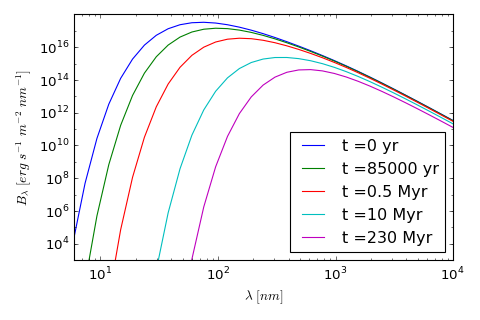

In [39]:
wl=logspace(log10(1e-15),log10(1e-5),100)
fig, ax = subplots(figsize=(6, 4))
nom=["0 yr",
     "85000 yr",
     "0.5 Myr",
     "10 Myr",
     "230 Myr"   
    ]
for i in range(5):
    
    ax.plot(1e9*wl,1e-9*novarad_evo[i], label="t ="+nom[i]) #canviat a nanometres

ax.legend(loc="lower right")
ax.set_xscale("log")    
ax.set_yscale("log")    
ax.set_yticks(10**arange(4,18,2))
ax.set_xlim(6)
ax.set_ylim(1e3)
ax.set_xlabel(r"$\lambda \ [nm]$")
ax.set_ylabel(r"$B_\lambda \ [erg \ s^{-1} \ m^{-2} \ nm^{-1}]$")
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width*0.70, box.height])

fig.tight_layout()
fig.savefig("imatges/radiancia_longitudonda_evolucion.pdf")

In [46]:
for i in range(5):
    print("instant %i=" %i,  wl[novarad_evo[i,:].argmax()])


instant 0= 7.27272736061e-08
instant 1= 9.69696978081e-08
instant 2= 1.57575758313e-07
instant 3= 3.45454545879e-07
instant 4= 5.69696969747e-07


## TOTAL LUMINOSITY

In [58]:
i_instants = np.array((0, 120, 150, 200, 250))
t_instants = instants[i_instants]
lumtot_evo=np.empty([5])

def integrantlum_evo(M, interpolation):
    lum = 10**interpolation(log10(M)) / L_SUN 
    return lum * stellar.ksi(M)

for ii, i in enumerate(i_instants) :

    index= ~np.isnan(lums_evol[:,i])
    intpollum_evo = sp.interpolate.interp1d(
        log10(masses[index]), # masses
        lums_evol[index,i], # luminosities
        kind='quadratic'
        )

    lumtot_evo[ii] = sp.integrate.quad(integrantlum_evo, 0.5, masses[index][-1], args=(intpollum_evo, ))[0]
    print("Total luminosity instant %i = " %ii, lumtot_evo[ii])

Total luminosity instant 0 =  13118737.636
Total luminosity instant 1 =  2071256.98409
Total luminosity instant 2 =  254960.997269
Total luminosity instant 3 =  10898.2717542
Total luminosity instant 4 =  1146.78409314


<IPython.core.display.Javascript object>


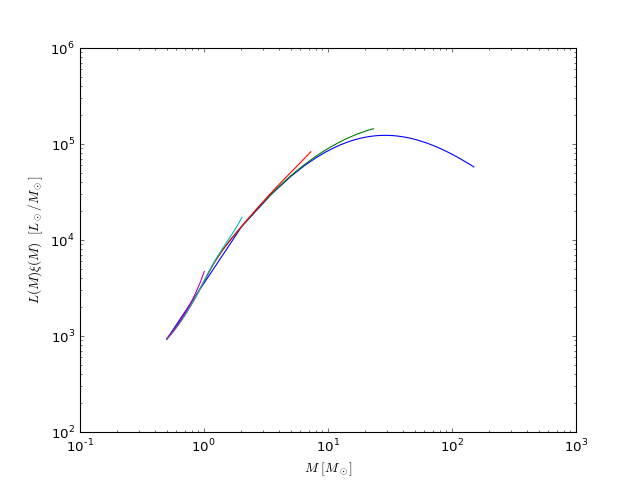

In [60]:
i_instants = np.array((0, 120, 150, 200, 250))


fig, ax = subplots()

for ii, i in enumerate(i_instants):
    
    index= ~np.isnan(lums_evol[:,i])
    intpollum_evo = sp.interpolate.interp1d(
        log10(masses[index]), # masses
        lums_evol[index,i], # luminosities
        kind='quadratic'
        )
    
    x=linspace(0.5, masses[index][-1], 100)
    
    ax.plot(x, integrantlum_evo(x, intpollum_evo))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r"$M \ [M_\odot]$")
    ax.set_ylabel(r"$L(M) \xi(M) \ \ [L_\odot/M_\odot]$")